In [17]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from datasets import load_from_disk
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics import silhouette_samples, silhouette_score, davies_bouldin_score, v_measure_score

In [2]:
from sklearn.cluster import DBSCAN
from collections import Counter

In [3]:
sampled_ds = load_from_disk("dataset-stackoverflow.hf")
torch_ds = sampled_ds.with_format("torch")
torch_ds

Dataset({
    features: ['label', 'sentence', 'gte', 'stella', 'tsne_gte', 'tsne_stella'],
    num_rows: 20000
})

# Using 1024 dimensions

In [4]:
X = torch_ds["stella"]
X_normalized = normalize(X)

In [137]:
min_samples_list = range(4, 30+1, 3)
eps_list = [0.06+0.025*step_count for step_count in range(0,12)]

In [43]:
results = {}
for min_samples in min_samples_list:
    for eps in eps_list:
        clustering = DBSCAN(eps=eps, min_samples=min_samples, metric='cosine').fit(X_normalized)
        v_measure = v_measure_score(torch_ds['label'], clustering.labels_).item()
        results[(min_samples, eps, v_measure)] = clustering.labels_
        print((min_samples, eps, v_measure))

(4, 0.06, 0.17693473958494577)
(4, 0.08499999999999999, 0.17853304699485723)
(4, 0.11, 0.18253747869633896)
(4, 0.135, 0.1885493239101734)
(4, 0.16, 0.2004725332367622)
(4, 0.185, 0.22237935905523618)
(4, 0.21000000000000002, 0.26820962647050234)
(4, 0.23500000000000001, 0.36662965129128305)
(4, 0.26, 0.31442771732830466)
(4, 0.28500000000000003, 0.37715583335147757)
(4, 0.31, 0.052598176995159056)
(4, 0.335, 0.03414174740932006)
(7, 0.06, 0.01070354630166934)
(7, 0.08499999999999999, 0.015510282781522132)
(7, 0.11, 0.022242967391115268)
(7, 0.135, 0.041159131534959786)
(7, 0.16, 0.0703782566483053)
(7, 0.185, 0.12219381144503862)
(7, 0.21000000000000002, 0.20821663606540047)
(7, 0.23500000000000001, 0.3361870072369509)
(7, 0.26, 0.2873056344862438)
(7, 0.28500000000000003, 0.3611102261963043)
(7, 0.31, 0.025927447750056273)
(7, 0.335, 0.01703513626262226)
(10, 0.06, 0.0)
(10, 0.08499999999999999, 0.0009687622239450074)
(10, 0.11, 0.0030828914341767865)
(10, 0.135, 0.013230893094358724

In [45]:
sorted(results, key=lambda x: -x[2])

[(25, 0.31, 0.5581979328311915),
 (28, 0.31, 0.5517615457658578),
 (10, 0.28500000000000003, 0.514381499280725),
 (13, 0.28500000000000003, 0.4910675912046857),
 (16, 0.28500000000000003, 0.4718391487055337),
 (10, 0.26, 0.46264328245465086),
 (19, 0.28500000000000003, 0.4527467997989293),
 (25, 0.335, 0.44633359543037604),
 (22, 0.28500000000000003, 0.4407175731993026),
 (28, 0.335, 0.44030485774566464),
 (25, 0.28500000000000003, 0.43330826541603223),
 (13, 0.26, 0.4309523031031035),
 (28, 0.28500000000000003, 0.4247243260532292),
 (13, 0.31, 0.41225811110362776),
 (16, 0.31, 0.39925160715005986),
 (16, 0.26, 0.3955560028588001),
 (19, 0.31, 0.388502026293206),
 (22, 0.31, 0.3784215991993203),
 (4, 0.28500000000000003, 0.37715583335147757),
 (19, 0.26, 0.3717528209325327),
 (4, 0.23500000000000001, 0.36662965129128305),
 (7, 0.28500000000000003, 0.3611102261963043),
 (22, 0.26, 0.3494477252446698),
 (7, 0.23500000000000001, 0.3361870072369509),
 (25, 0.26, 0.3331587837823213),
 (4, 0

In [138]:
colors = ['r', 'g', 'b', 'y']
class_names = sampled_ds.features['label'].names
index_to_colour_names = {i:(color, name) for i, (color, name) in enumerate(zip(colors, class_names))}
index_to_colour_names[-1] = ('black', 'outliers')
index_to_colour_names

{0: ('r', 'eosio'),
 1: ('g', 'fitness'),
 2: ('b', 'latin'),
 3: ('y', 'softwarerecs'),
 -1: ('black', 'outliers')}

{0: ('r', 'eosio'), 1: ('g', 'fitness'), 2: ('b', 'latin'), 3: ('b', 'latin'), -1: ('black', 'outliers'), 4: ('y', 'softwarerecs'), 5: ('b', 'latin'), 6: ('g', 'fitness'), 7: ('y', 'softwarerecs'), 8: ('y', 'softwarerecs'), 9: ('y', 'softwarerecs')}


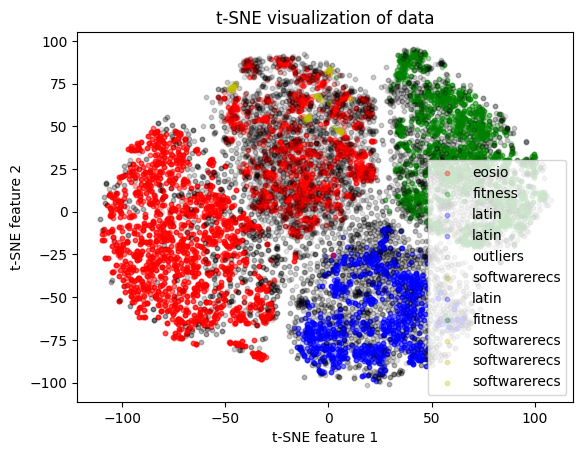

In [97]:
mapped_dict = index_to_colour_names.copy()
mapped_dict[-1], mapped_dict[0], mapped_dict[1], mapped_dict[2], mapped_dict[3], mapped_dict[4], mapped_dict[5], mapped_dict[6], mapped_dict[7], mapped_dict[8], mapped_dict[9] = mapped_dict[-1], mapped_dict[0], mapped_dict[1], mapped_dict[2], mapped_dict[2], mapped_dict[3], mapped_dict[2], mapped_dict[1], mapped_dict[3], mapped_dict[3], mapped_dict[3]
print(mapped_dict)

for i, (color, name) in mapped_dict.items():
    indices = results[testing] == i
    alpha = 0.3
    if color == 'black':
        alpha = 0.1
    scatter = plt.scatter(torch_ds['tsne_stella'][indices, 0], torch_ds['tsne_stella'][indices, 1], 
                          c=color, 
                          s=10,  # Reduced dot size
                          alpha=alpha,  # Add transparency
                          label=name)

plt.title('t-SNE visualization of data')
plt.xlabel('t-SNE feature 1')
plt.ylabel('t-SNE feature 2')

# Add a text legend
plt.legend()

plt.show()

## Manual Experimenting

In [135]:
clustering = DBSCAN(eps=0.31, min_samples=50, metric='cosine').fit(X_normalized)
v_measure_score(torch_ds['label'], clustering.labels_).item()

0.4936960279821284

In [133]:
print("new label, old label")
sorted(Counter(list(zip(clustering.labels_.tolist(), torch_ds["label"].tolist()))).items(), key=lambda x: (x[0][0], -x[1]))

new label, old label


[((-1, 3), 5134),
 ((-1, 1), 3025),
 ((-1, 2), 2953),
 ((-1, 0), 1743),
 ((0, 0), 3469),
 ((0, 3), 10),
 ((1, 2), 1645),
 ((2, 1), 1825),
 ((3, 3), 196)]

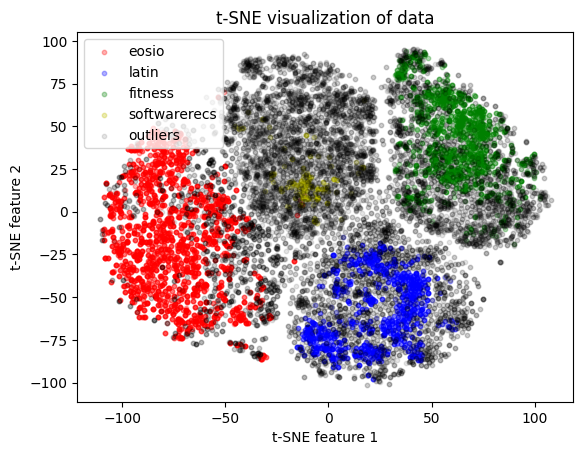

In [134]:
mapped_dict = index_to_colour_names.copy()
mapped_dict[-1], mapped_dict[0], mapped_dict[1], mapped_dict[2], mapped_dict[3] = mapped_dict[-1], mapped_dict[0], mapped_dict[2], mapped_dict[1], mapped_dict[3]

for i, (color, name) in mapped_dict.items():
    indices = clustering.labels_ == i
    alpha = 0.3
    if color == 'black':
        alpha = 0.1
    scatter = plt.scatter(torch_ds['tsne_stella'][indices, 0], torch_ds['tsne_stella'][indices, 1], 
                          c=color, 
                          s=10,  # Reduced dot size
                          alpha=alpha,  # Add transparency
                          label=name)

plt.title('t-SNE visualization of data')
plt.xlabel('t-SNE feature 1')
plt.ylabel('t-SNE feature 2')

# Add a text legend
plt.legend()

plt.show()

# Using 2 dimensions (TSNE)

In [11]:
X = torch_ds["tsne_stella"]
X

tensor([[-46.8772,  53.3544],
        [ 72.0192,  33.4261],
        [-15.1454,  15.8605],
        ...,
        [-24.9773, -21.5812],
        [-65.1013, -22.4765],
        [ -5.2000, -57.3683]])

In [5]:
distance_matrix = euclidean_distances(X)
distance_matrix

array([[  0.      , 120.5549  ,  49.119236, ...,  78.07008 ,  77.98994 ,
        118.306755],
       [120.5549  ,   0.      ,  88.916916, ..., 111.5084  , 148.07812 ,
        119.19065 ],
       [ 49.119236,  88.916916,   0.      , ...,  38.711006,  62.970734,
         73.900986],
       ...,
       [ 78.07008 , 111.5084  ,  38.711006, ...,   0.      ,  40.133995,
         40.88838 ],
       [ 77.98994 , 148.07812 ,  62.970734, ...,  40.133995,   0.      ,
         69.322525],
       [118.306755, 119.19065 ,  73.900986, ...,  40.88838 ,  69.322525,
          0.      ]], dtype=float32)

In [36]:
MIN_SAMPLES = 20
indices = np.argpartition(distance_matrix, (MIN_SAMPLES+1), axis=1)[:,1:(MIN_SAMPLES+1)]
smallest_differences = np.take_along_axis(distance_matrix, indices, axis=1)
smallest_differences_mean = smallest_differences.mean(axis=1)
smallest_differences_mean

array([1.4340067, 1.5344274, 1.7384138, ..., 1.9189014, 2.0288434,
       1.9424995], dtype=float32)

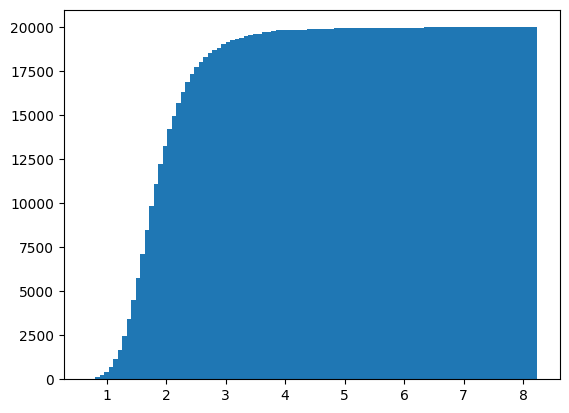

In [37]:
plt.hist(smallest_differences_mean, bins=100, cumulative=True)
plt.show()

In [38]:
clustering = DBSCAN(eps=3, min_samples=20, metric='euclidean').fit(X)
print(Counter(clustering.labels_))

Counter({np.int64(0): 4116, np.int64(2): 2738, np.int64(1): 2657, np.int64(-1): 2067, np.int64(3): 1332, np.int64(10): 675, np.int64(14): 560, np.int64(15): 541, np.int64(17): 444, np.int64(4): 303, np.int64(7): 301, np.int64(29): 265, np.int64(12): 236, np.int64(6): 224, np.int64(9): 222, np.int64(8): 168, np.int64(28): 159, np.int64(16): 146, np.int64(46): 116, np.int64(42): 115, np.int64(20): 114, np.int64(18): 106, np.int64(19): 103, np.int64(40): 91, np.int64(35): 88, np.int64(37): 83, np.int64(27): 77, np.int64(43): 77, np.int64(51): 70, np.int64(30): 69, np.int64(5): 64, np.int64(45): 63, np.int64(38): 62, np.int64(41): 59, np.int64(61): 56, np.int64(60): 54, np.int64(21): 53, np.int64(31): 52, np.int64(36): 52, np.int64(44): 51, np.int64(26): 51, np.int64(49): 51, np.int64(22): 50, np.int64(39): 49, np.int64(72): 48, np.int64(11): 47, np.int64(56): 44, np.int64(32): 43, np.int64(58): 43, np.int64(34): 37, np.int64(57): 36, np.int64(67): 34, np.int64(66): 33, np.int64(13): 32, n

In [39]:
colors = ['r', 'g', 'b', 'y']
class_names = sampled_ds.features['label'].names
index_to_colour_names = {i:(color, name) for i, (color, name) in enumerate(zip(colors, class_names))}
index_to_colour_names

{0: ('r', 'eosio'),
 1: ('g', 'fitness'),
 2: ('b', 'latin'),
 3: ('y', 'softwarerecs')}

In [40]:
print("new label, old label")
sorted(Counter(list(zip(clustering.labels_.tolist(), torch_ds["label"].tolist()))).items(), key=lambda x: (x[0][0], -x[1]))

new label, old label


[((-1, 0), 836),
 ((-1, 2), 614),
 ((-1, 1), 326),
 ((-1, 3), 291),
 ((0, 3), 4074),
 ((0, 0), 21),
 ((0, 2), 16),
 ((0, 1), 5),
 ((1, 1), 2649),
 ((1, 2), 4),
 ((1, 3), 3),
 ((1, 0), 1),
 ((2, 2), 2732),
 ((2, 3), 4),
 ((2, 1), 2),
 ((3, 1), 1331),
 ((3, 2), 1),
 ((4, 2), 303),
 ((5, 0), 64),
 ((6, 0), 224),
 ((7, 0), 299),
 ((7, 3), 2),
 ((8, 0), 160),
 ((8, 3), 7),
 ((8, 2), 1),
 ((9, 2), 222),
 ((10, 0), 665),
 ((10, 3), 10),
 ((11, 0), 47),
 ((12, 2), 236),
 ((13, 0), 32),
 ((14, 3), 555),
 ((14, 2), 5),
 ((15, 0), 540),
 ((15, 3), 1),
 ((16, 2), 145),
 ((16, 3), 1),
 ((17, 0), 444),
 ((18, 1), 105),
 ((18, 3), 1),
 ((19, 3), 103),
 ((20, 0), 106),
 ((20, 3), 8),
 ((21, 0), 53),
 ((22, 0), 50),
 ((23, 0), 22),
 ((24, 2), 25),
 ((25, 0), 30),
 ((26, 0), 51),
 ((27, 0), 77),
 ((28, 3), 158),
 ((28, 2), 1),
 ((29, 0), 263),
 ((29, 3), 2),
 ((30, 0), 68),
 ((30, 3), 1),
 ((31, 0), 52),
 ((32, 0), 43),
 ((33, 2), 15),
 ((34, 3), 37),
 ((35, 2), 87),
 ((35, 1), 1),
 ((36, 3), 46),
 ((36

In [44]:
torch_ds['tsne_stella']

tensor([[-46.8772,  53.3544],
        [ 72.0192,  33.4261],
        [-15.1454,  15.8605],
        ...,
        [-24.9773, -21.5812],
        [-65.1013, -22.4765],
        [ -5.2000, -57.3683]])

In [42]:
mapped_dict = index_to_colour_names.copy()
mapped_dict[-1], mapped_dict[0], mapped_dict[1], mapped_dict[2], mapped_dict[3] = mapped_dict[0], mapped_dict[3], mapped_dict[1], mapped_dict[1]

for i, (color, name) in mapped_dict.items():
    indices = clustering.labels_ == i
    scatter = plt.scatter(torch_ds['tsne_stella'][indices, 0], torch_ds['tsne_stella'][indices, 1], 
                          c=color, 
                          s=10,  # Reduced dot size
                          alpha=0.3,  # Add transparency
                          label=name)

plt.title('t-SNE visualization of data')
plt.xlabel('t-SNE feature 1')
plt.ylabel('t-SNE feature 2')

# Add a text legend
plt.legend()

plt.show()

ValueError: not enough values to unpack (expected 5, got 4)

# Appendix

In [85]:
MIN_SAMPLES = 40
indices = np.argpartition(similarity_matrix, -(MIN_SAMPLES+1), axis=1)[:,-(MIN_SAMPLES+1):-1]
top_similarities = np.take_along_axis(similarity_matrix, indices, axis=1)
smallest_differences = 1 - top_similarities
smallest_differences_mean = smallest_differences.mean(axis=1)
smallest_differences_mean

array([0.3366825 , 0.27524445, 0.27265025, ..., 0.35395546, 0.24686335,
       0.30401348])

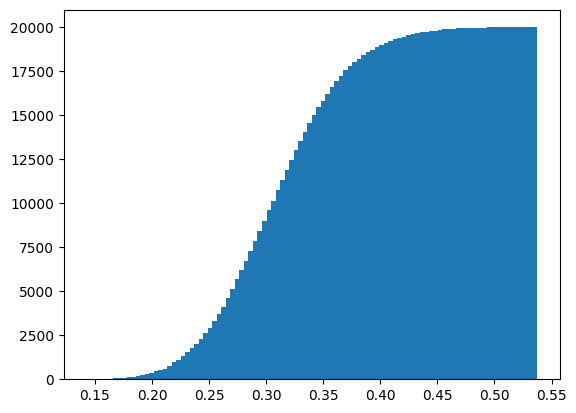

In [86]:
plt.hist(smallest_differences_mean, bins=100, cumulative=True)
plt.show()

In [38]:
min_samples_list = 
eps_list = [0.06+0.025*step_count for step_count in range(0,12)]